<a href="https://colab.research.google.com/github/np02cs4a240037-collab/assignement/blob/main/WLVID_kobid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving World Happiness Report.csv to World Happiness Report.csv


PROBLEM 3.1


In [ ]:
print("=" * 70)
print("PROBLEM 3.1 - QUESTION 1: DATA EXPLORATION AND UNDERSTANDING")
print("=" * 70)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("\n1.1 DATASET OVERVIEW")
print("-" * 40)
df = pd.read_csv('World Happiness Report.csv')
print("First 10 rows of the dataset:")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumns and their data types:")
print(df.dtypes)
print("\n1.2 BASIC STATISTICS")
print("-" * 40)
score_mean = df['Score'].mean()
score_median = df['Score'].median()
score_std = df['Score'].std()

print(f"Score Statistics:")
print(f"Mean: {score_mean:.3f}")
print(f"Median: {score_median:.3f}")
print(f"Standard Deviation: {score_std:.3f}")
max_score_country = df.loc[df['Score'].idxmax(), 'Country name']
max_score_value = df['Score'].max()
min_score_country = df.loc[df['Score'].idxmin(), 'Country name']
min_score_value = df['Score'].min()

print(f"\nHappiest Country: {max_score_country} (Score: {max_score_value:.3f})")
print(f"Least Happy Country: {min_score_country} (Score: {min_score_value:.3f})")
print("\n1.3 MISSING VALUES")
print("-" * 40)
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.1 - QUESTION 1")
print("=" * 70)

PROBLEM 3.1 - QUESTION 1: DATA EXPLORATION AND UNDERSTANDING

1.1 DATASET OVERVIEW
----------------------------------------
First 10 rows of the dataset:
  Country name  Score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699    

In [ ]:
print("=" * 70)
print("PROBLEM 3.1 - QUESTION 2: FILTERING, SORTING AND ADDING COLUMNS")
print("=" * 70)
print("\n1.4 FILTERING AND SORTING")
print("-" * 40)
high_score_df = df[df['Score'] > 7.5]
print(f"Number of countries with Score > 7.5: {len(high_score_df)}")
high_score_sorted = high_score_df.sort_values('Log GDP per capita', ascending=False)
print("\nTop 10 countries with Score > 7.5 sorted by GDP per capita:")
print(high_score_sorted[['Country name', 'Score', 'Log GDP per capita']].head(10))
print("\n1.5 ADDING NEW COLUMNS")
print("-" * 40)
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['Score'].apply(categorize_happiness)
print("Happiness Category Distribution:")
print(df['Happiness Category'].value_counts())

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.1 - QUESTION 2")
print("=" * 70)

PROBLEM 3.1 - QUESTION 2: FILTERING, SORTING AND ADDING COLUMNS

1.4 FILTERING AND SORTING
----------------------------------------
Number of countries with Score > 7.5: 3

Top 10 countries with Score > 7.5 sorted by GDP per capita:
  Country name  Score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844

1.5 ADDING NEW COLUMNS
----------------------------------------
Happiness Category Distribution:
Happiness Category
Medium    70
High      56
Low       17
Name: count, dtype: int64

COMPLETED: PROBLEM 3.1 - QUESTION 2


PROBLEM 3.1 - QUESTION 3: DATA VISUALIZATIONS

2. DATA VISUALIZATIONS
----------------------------------------


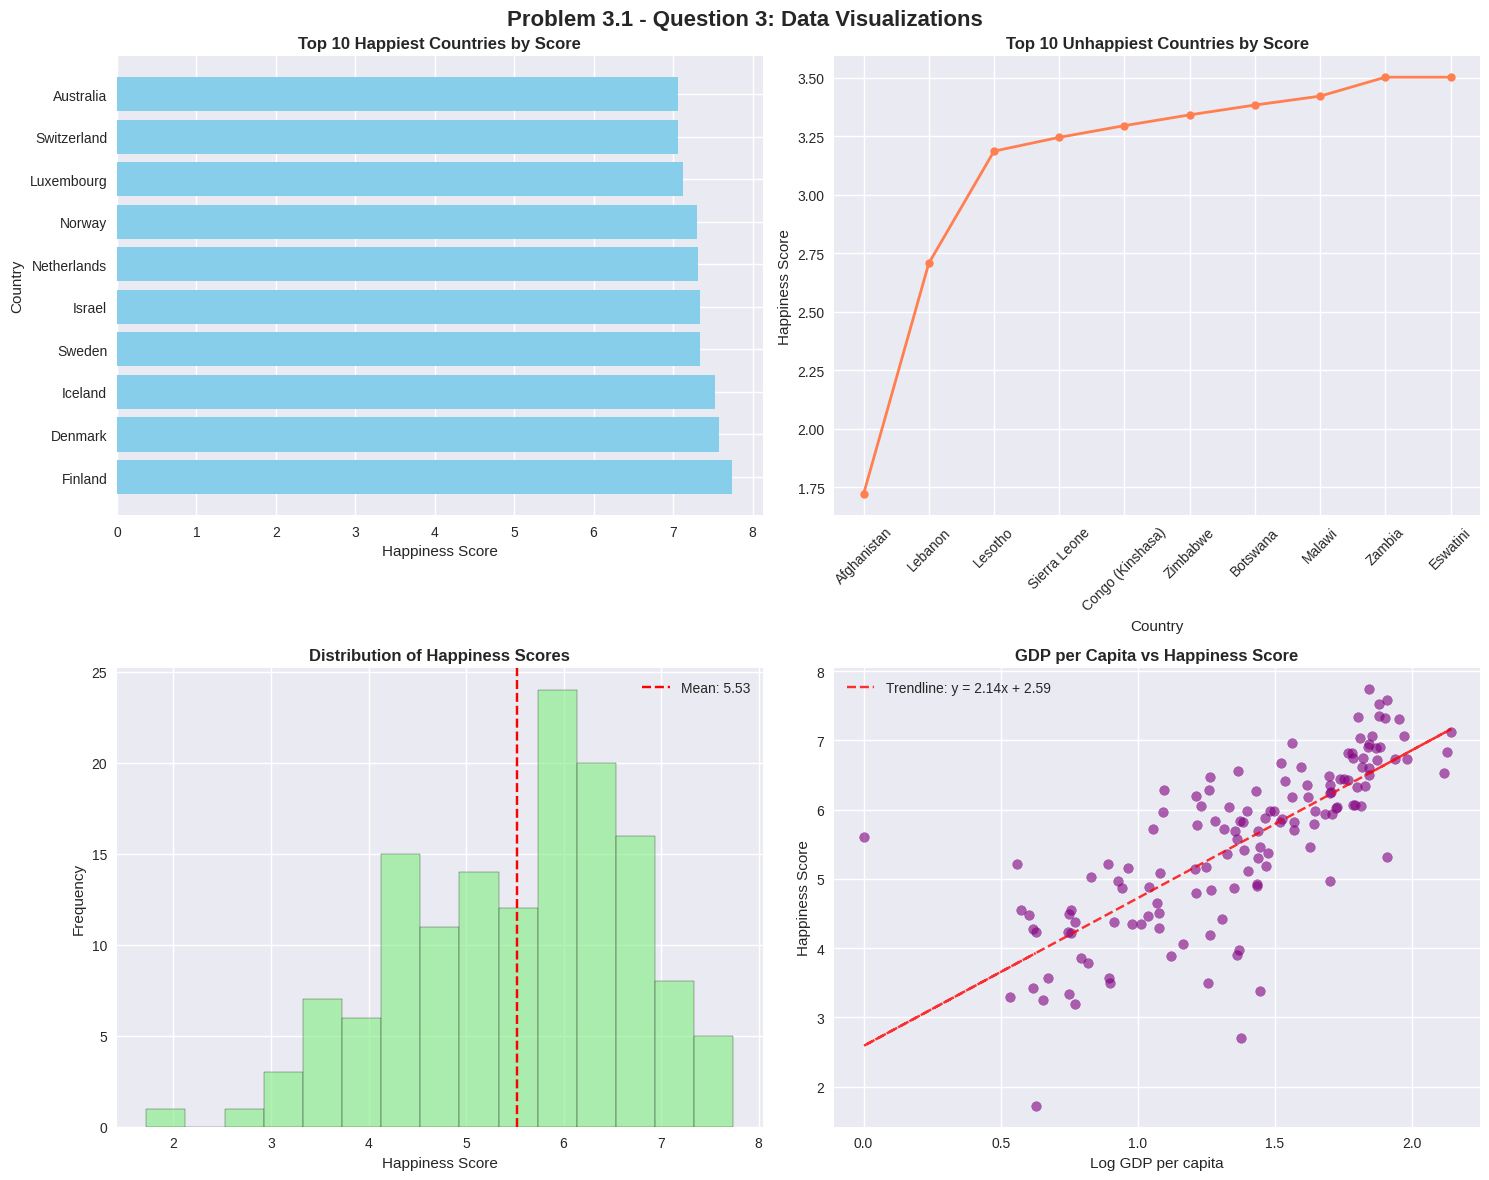


Interpretation of Score Distribution Histogram:
The histogram shows that happiness scores are roughly normally distributed
with most countries clustering around the 4-6 score range.
There is a right skew indicating fewer countries with very high happiness scores.
The mean score is approximately 5.5, with scores ranging from about 1.7 to 7.7.

Scatter Plot Info:
Total countries with GDP data: 140
Countries with missing GDP data: 3
Correlation between GDP per capita and Happiness Score: 0.769

COMPLETED: PROBLEM 3.1 - QUESTION 3


In [ ]:

print("=" * 70)
print("PROBLEM 3.1 - QUESTION 3: DATA VISUALIZATIONS")
print("=" * 70)
print("\n2. DATA VISUALIZATIONS")
print("-" * 40)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Problem 3.1 - Question 3: Data Visualizations', fontsize=16, fontweight='bold')
top_10_happiest = df.nlargest(10, 'Score')
axes[0, 0].barh(top_10_happiest['Country name'], top_10_happiest['Score'], color='skyblue')
axes[0, 0].set_title('Top 10 Happiest Countries by Score', fontweight='bold')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Country')
top_10_unhappiest = df.nsmallest(10, 'Score')
axes[0, 1].plot(top_10_unhappiest['Country name'], top_10_unhappiest['Score'],
                marker='o', linewidth=2, markersize=6, color='coral')
axes[0, 1].set_title('Top 10 Unhappiest Countries by Score', fontweight='bold')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Happiness Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[1, 0].hist(df['Score'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Happiness Scores', fontweight='bold')
axes[1, 0].set_xlabel('Happiness Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Score"].mean():.2f}')
axes[1, 0].legend()
clean_df = df.dropna(subset=['Log GDP per capita', 'Score'])

axes[1, 1].scatter(clean_df['Log GDP per capita'], clean_df['Score'], alpha=0.6, color='purple')
axes[1, 1].set_title('GDP per Capita vs Happiness Score', fontweight='bold')
axes[1, 1].set_xlabel('Log GDP per capita')
axes[1, 1].set_ylabel('Happiness Score')
if len(clean_df) > 0:
    z = np.polyfit(clean_df['Log GDP per capita'], clean_df['Score'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(clean_df['Log GDP per capita'], p(clean_df['Log GDP per capita']), "r--", alpha=0.8,
                   label=f'Trendline: y = {z[0]:.2f}x + {z[1]:.2f}')
    axes[1, 1].legend()

plt.tight_layout()
plt.show()
print("\nInterpretation of Score Distribution Histogram:")
print("The histogram shows that happiness scores are roughly normally distributed")
print("with most countries clustering around the 4-6 score range.")
print("There is a right skew indicating fewer countries with very high happiness scores.")
print("The mean score is approximately 5.5, with scores ranging from about 1.7 to 7.7.")

print(f"\nScatter Plot Info:")
print(f"Total countries with GDP data: {len(clean_df)}")
print(f"Countries with missing GDP data: {len(df) - len(clean_df)}")

if len(clean_df) > 0:
    correlation = clean_df['Log GDP per capita'].corr(clean_df['Score'])
    print(f"Correlation between GDP per capita and Happiness Score: {correlation:.3f}")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.1 - QUESTION 3")
print("=" * 7)

PROBLEM 3.2


In [ ]:
print("=" * 70)
print("PROBLEM 3.2 - QUESTION 1: PREPARING SOUTH ASIA DATASET")
print("=" * 70)
print("\nTASK 1: PREPARING SOUTH ASIA DATASET")
print("-" * 40)

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
available_countries = df['Country name'].unique()
south_asia_countries_actual = [country for country in south_asian_countries
                              if country in available_countries]
if "Srilanka" in available_countries:
    south_asia_countries_actual.append("Srilanka")

print("South Asian countries found in dataset:", south_asia_countries_actual)
south_asia_df = df[df['Country name'].isin(south_asia_countries_actual)].copy()

print(f"\nSouth Asia dataset shape: {south_asia_df.shape}")
print("\nSouth Asian countries in dataset:")
print(south_asia_df[['Country name', 'Score']].sort_values('Score', ascending=False))
south_asia_df.to_csv('south_asia_happiness.csv', index=False)
print("\nSouth Asia dataset saved as 'south_asia_happiness.csv'")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.2 - QUESTION 1")
print("=" * 70)

PROBLEM 3.2 - QUESTION 1: PREPARING SOUTH ASIA DATASET

TASK 1: PREPARING SOUTH ASIA DATASET
----------------------------------------
South Asian countries found in dataset: ['Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']

South Asia dataset shape: (6, 10)

South Asian countries in dataset:
    Country name  Score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
127    Sri Lanka  3.898
128   Bangladesh  3.886
142  Afghanistan  1.721

South Asia dataset saved as 'south_asia_happiness.csv'

COMPLETED: PROBLEM 3.2 - QUESTION 1


PROBLEM 3.2 - QUESTION 2: COMPOSITE SCORE RANKING

TASK 2: COMPOSITE SCORE RANKING
----------------------------------------
South Asian countries ranked by Composite Score:
    Country name  Score  Composite Score  Original Rank  Composite Rank
127    Sri Lanka  3.898           1.0739            4.0             1.0
92         Nepal  5.158           0.8159            1.0             2.0
125        India  4.054           0.7874            3.0             3.0
107     Pakistan  4.657           0.7039            2.0             4.0
128   Bangladesh  3.886           0.6774            5.0             5.0
142  Afghanistan  1.721           0.3238            6.0             6.0


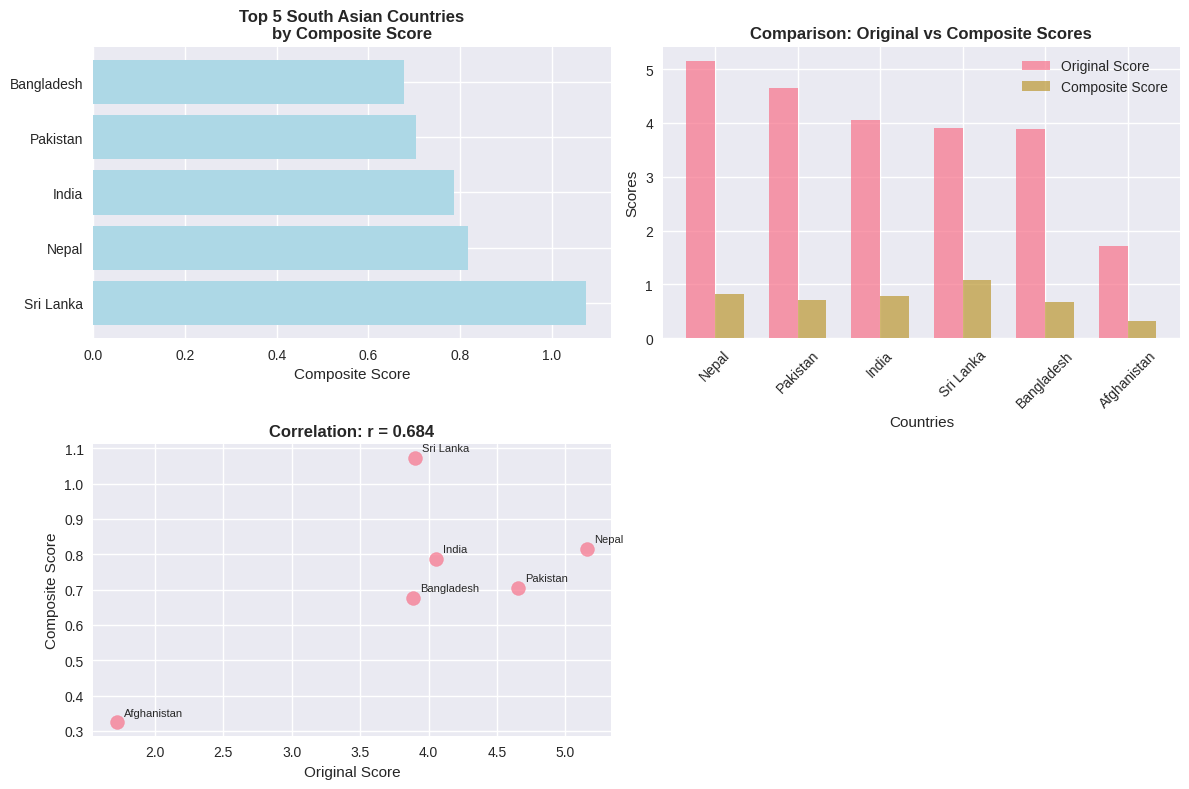


Correlation between Original Score and Composite Score: 0.684

Discussion on Composite Score vs Original Score:
The composite score provides an alternative ranking that emphasizes economic,
social support, and health factors. Countries with strong performance in these
three areas will rank higher in the composite score compared to the original score.

COMPLETED: PROBLEM 3.2 - QUESTION 2


In [ ]:

print("=" * 70)
print("PROBLEM 3.2 - QUESTION 2: COMPOSITE SCORE RANKING")
print("=" * 70)
print("\nTASK 2: COMPOSITE SCORE RANKING")
print("-" * 40)
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                  0.30 * south_asia_df['Social support'] +
                                  0.30 * south_asia_df['Healthy life expectancy'])
south_asia_df['Composite Rank'] = south_asia_df['Composite Score'].rank(ascending=False)
south_asia_df['Original Rank'] = south_asia_df['Score'].rank(ascending=False)

print("South Asian countries ranked by Composite Score:")
composite_ranking = south_asia_df[['Country name', 'Score', 'Composite Score',
                                 'Original Rank', 'Composite Rank']].sort_values('Composite Score', ascending=False)
print(composite_ranking)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='lightblue')
plt.title('Top 5 South Asian Countries\nby Composite Score', fontweight='bold')
plt.xlabel('Composite Score')
plt.subplot(2, 2, 2)
x_pos = np.arange(len(south_asia_df))
width = 0.35

plt.bar(x_pos - width/2, south_asia_df['Score'], width, label='Original Score', alpha=0.7)
plt.bar(x_pos + width/2, south_asia_df['Composite Score'], width, label='Composite Score', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('Scores')
plt.title('Comparison: Original vs Composite Scores', fontweight='bold')
plt.xticks(x_pos, south_asia_df['Country name'], rotation=45)
plt.legend()
plt.subplot(2, 2, 3)
correlation = south_asia_df['Score'].corr(south_asia_df['Composite Score'])
plt.scatter(south_asia_df['Score'], south_asia_df['Composite Score'], s=100, alpha=0.7)
for i, country in enumerate(south_asia_df['Country name']):
    plt.annotate(country, (south_asia_df['Score'].iloc[i], south_asia_df['Composite Score'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title(f'Correlation: r = {correlation:.3f}', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nCorrelation between Original Score and Composite Score: {correlation:.3f}")

print("\nDiscussion on Composite Score vs Original Score:")
print("The composite score provides an alternative ranking that emphasizes economic,")
print("social support, and health factors. Countries with strong performance in these")
print("three areas will rank higher in the composite score compared to the original score.")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.2 - QUESTION 2")
print("=" * 70)

PROBLEM 3.2 - QUESTION 3: OUTLIER DETECTION

TASK 3: OUTLIER DETECTION
----------------------------------------
Score outliers bounds: [2.963, 5.432]
Score outliers: ['Afghanistan']

GDP per capita outliers bounds: [0.745, 1.401]
GDP per capita outliers: ['Afghanistan']


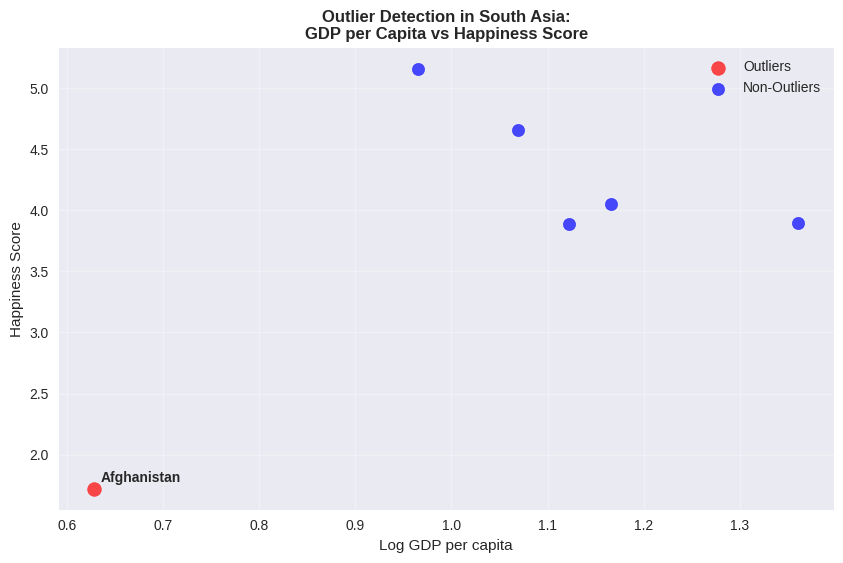


Discussion on Outliers:
- Afghanistan: Score=1.721, GDP=0.628

These outliers may significantly affect regional averages and should be
considered separately in analysis as they represent unique cases.

COMPLETED: PROBLEM 3.2 - QUESTION 3


In [ ]:

print("=" * 70)
print("PROBLEM 3.2 - QUESTION 3: OUTLIER DETECTION")
print("=" * 70)
print("\nTASK 3: OUTLIER DETECTION")
print("-" * 40)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
score_outliers, score_lower, score_upper = detect_outliers_iqr(south_asia_df, 'Score')
gdp_outliers, gdp_lower, gdp_upper = detect_outliers_iqr(south_asia_df, 'Log GDP per capita')

print(f"Score outliers bounds: [{score_lower:.3f}, {score_upper:.3f}]")
print("Score outliers:", list(score_outliers['Country name']) if len(score_outliers) > 0 else "None")

print(f"\nGDP per capita outliers bounds: [{gdp_lower:.3f}, {gdp_upper:.3f}]")
print("GDP per capita outliers:", list(gdp_outliers['Country name']) if len(gdp_outliers) > 0 else "None")
plt.figure(figsize=(10, 6))
all_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
non_outliers = south_asia_df[~south_asia_df['Country name'].isin(all_outliers['Country name'])]

if len(all_outliers) > 0:
    plt.scatter(all_outliers['Log GDP per capita'], all_outliers['Score'],
               color='red', s=100, label='Outliers', alpha=0.7)
    for i, country in enumerate(all_outliers['Country name']):
        plt.annotate(country, (all_outliers['Log GDP per capita'].iloc[i], all_outliers['Score'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')

if len(non_outliers) > 0:
    plt.scatter(non_outliers['Log GDP per capita'], non_outliers['Score'],
               color='blue', s=80, label='Non-Outliers', alpha=0.7)

plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Outlier Detection in South Asia:\nGDP per Capita vs Happiness Score', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nDiscussion on Outliers:")
if len(all_outliers) > 0:
    for country in all_outliers['Country name']:
        country_data = south_asia_df[south_asia_df['Country name'] == country].iloc[0]
        print(f"- {country}: Score={country_data['Score']:.3f}, GDP={country_data['Log GDP per capita']:.3f}")
    print("\nThese outliers may significantly affect regional averages and should be")
    print("considered separately in analysis as they represent unique cases.")
else:
    print("No significant outliers detected in South Asian data.")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.2 - QUESTION 3")
print("=" * 70)

PROBLEM 3.2 - QUESTION 4: EXPLORING TRENDS ACROSS METRICS

TASK 4: EXPLORING TRENDS ACROSS METRICS
----------------------------------------
Correlation between Freedom and Score: 0.801
Correlation between Generosity and Score: 0.875


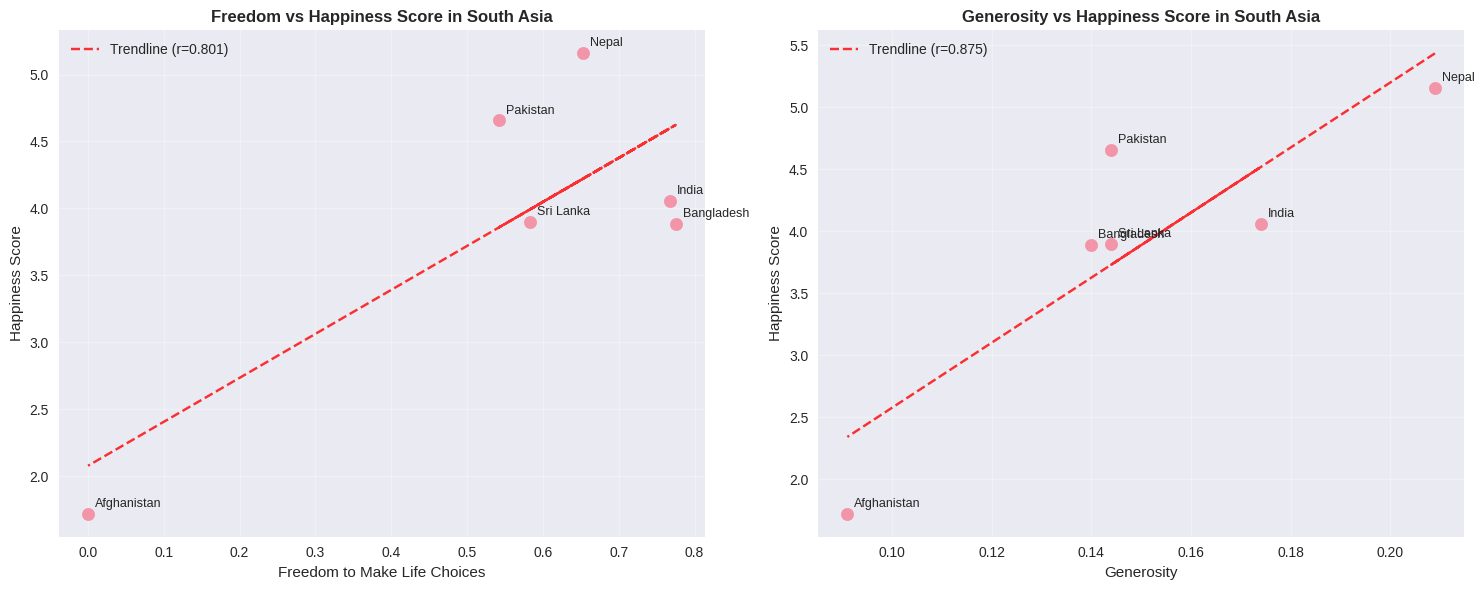


Discussion on Relationships:
Strongest relationship: Generosity with Score (r = 0.875)
Weakest relationship: Freedom with Score (r = 0.801)

Interpretation:
The correlation coefficients indicate how strongly each metric relates to happiness.
A higher absolute correlation value suggests a stronger linear relationship.
In South Asia, this analysis shows which factors are more closely tied to overall happiness.

COMPLETED: PROBLEM 3.2 - QUESTION 4


In [ ]:
print("=" * 70)
print("PROBLEM 3.2 - QUESTION 4: EXPLORING TRENDS ACROSS METRICS")
print("=" * 70)
print("\nTASK 4: EXPLORING TRENDS ACROSS METRICS")
print("-" * 40)
freedom_corr = south_asia_df['Score'].corr(south_asia_df['Freedom to make life choices'])
generosity_corr = south_asia_df['Score'].corr(south_asia_df['Generosity'])

print(f"Correlation between Freedom and Score: {freedom_corr:.3f}")
print(f"Correlation between Generosity and Score: {generosity_corr:.3f}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['Score'], s=80, alpha=0.7)
for i, country in enumerate(south_asia_df['Country name']):
    ax1.annotate(country, (south_asia_df['Freedom to make life choices'].iloc[i], south_asia_df['Score'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
z_freedom = np.polyfit(south_asia_df['Freedom to make life choices'], south_asia_df['Score'], 1)
p_freedom = np.poly1d(z_freedom)
ax1.plot(south_asia_df['Freedom to make life choices'], p_freedom(south_asia_df['Freedom to make life choices']),
         "r--", alpha=0.8, label=f'Trendline (r={freedom_corr:.3f})')

ax1.set_xlabel('Freedom to Make Life Choices')
ax1.set_ylabel('Happiness Score')
ax1.set_title('Freedom vs Happiness Score in South Asia', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax2.scatter(south_asia_df['Generosity'], south_asia_df['Score'], s=80, alpha=0.7)
for i, country in enumerate(south_asia_df['Country name']):
    ax2.annotate(country, (south_asia_df['Generosity'].iloc[i], south_asia_df['Score'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
z_generosity = np.polyfit(south_asia_df['Generosity'], south_asia_df['Score'], 1)
p_generosity = np.poly1d(z_generosity)
ax2.plot(south_asia_df['Generosity'], p_generosity(south_asia_df['Generosity']),
         "r--", alpha=0.8, label=f'Trendline (r={generosity_corr:.3f})')

ax2.set_xlabel('Generosity')
ax2.set_ylabel('Happiness Score')
ax2.set_title('Generosity vs Happiness Score in South Asia', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDiscussion on Relationships:")
if abs(freedom_corr) > abs(generosity_corr):
    print(f"Strongest relationship: Freedom with Score (r = {freedom_corr:.3f})")
    print(f"Weakest relationship: Generosity with Score (r = {generosity_corr:.3f})")
else:
    print(f"Strongest relationship: Generosity with Score (r = {generosity_corr:.3f})")
    print(f"Weakest relationship: Freedom with Score (r = {freedom_corr:.3f})")

print("\nInterpretation:")
print("The correlation coefficients indicate how strongly each metric relates to happiness.")
print("A higher absolute correlation value suggests a stronger linear relationship.")
print("In South Asia, this analysis shows which factors are more closely tied to overall happiness.")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.2 - QUESTION 4")
print("=" * 70)

PROBLEM 3.2 - QUESTION 5: GAP ANALYSIS

TASK 5: GAP ANALYSIS
----------------------------------------
Top 3 countries with largest positive GDP-Score Gap (GDP > Score):
    Country name  Log GDP per capita  Score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764

Top 3 countries with largest negative GDP-Score Gap (GDP < Score):
    Country name  Log GDP per capita  Score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888


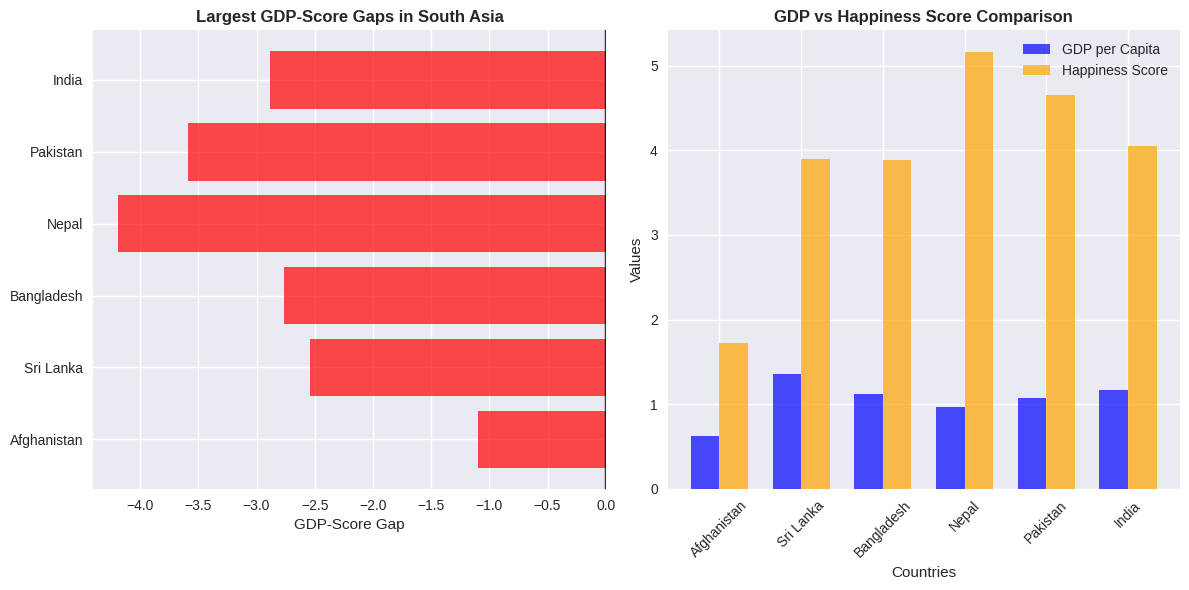


Analysis of GDP-Score Gaps:
Positive Gap (GDP > Score): Countries where economic output doesn't fully translate to happiness
Negative Gap (GDP < Score): Countries achieving higher happiness relative to their economic output

Implications:
- Positive gaps may indicate issues with wealth distribution or social factors
- Negative gaps suggest strong social, cultural, or governance factors boosting happiness
- This analysis helps identify countries that outperform or underperform expectations

COMPLETED: PROBLEM 3.2 - QUESTION 5


In [ ]:
print("=" * 70)
print("PROBLEM 3.2 - QUESTION 5: GAP ANALYSIS")
print("=" * 70)
print("\nTASK 5: GAP ANALYSIS")
print("-" * 40)
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['Score']
largest_positive_gap = south_asia_df.nlargest(3, 'GDP-Score Gap')
largest_negative_gap = south_asia_df.nsmallest(3, 'GDP-Score Gap')

print("Top 3 countries with largest positive GDP-Score Gap (GDP > Score):")
print(largest_positive_gap[['Country name', 'Log GDP per capita', 'Score', 'GDP-Score Gap']])

print("\nTop 3 countries with largest negative GDP-Score Gap (GDP < Score):")
print(largest_negative_gap[['Country name', 'Log GDP per capita', 'Score', 'GDP-Score Gap']])
plt.figure(figsize=(12, 6))
gap_comparison = pd.concat([largest_positive_gap, largest_negative_gap])

plt.subplot(1, 2, 1)
colors = ['green' if x > 0 else 'red' for x in gap_comparison['GDP-Score Gap']]
plt.barh(gap_comparison['Country name'], gap_comparison['GDP-Score Gap'], color=colors, alpha=0.7)
plt.xlabel('GDP-Score Gap')
plt.title('Largest GDP-Score Gaps in South Asia', fontweight='bold')
plt.axvline(0, color='black', linestyle='-', alpha=0.8)

plt.subplot(1, 2, 2)
x_pos = np.arange(len(gap_comparison))
width = 0.35

plt.bar(x_pos - width/2, gap_comparison['Log GDP per capita'], width, label='GDP per Capita', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, gap_comparison['Score'], width, label='Happiness Score', alpha=0.7, color='orange')
plt.xlabel('Countries')
plt.ylabel('Values')
plt.title('GDP vs Happiness Score Comparison', fontweight='bold')
plt.xticks(x_pos, gap_comparison['Country name'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

print("\nAnalysis of GDP-Score Gaps:")
print("Positive Gap (GDP > Score): Countries where economic output doesn't fully translate to happiness")
print("Negative Gap (GDP < Score): Countries achieving higher happiness relative to their economic output")
print("\nImplications:")
print("- Positive gaps may indicate issues with wealth distribution or social factors")
print("- Negative gaps suggest strong social, cultural, or governance factors boosting happiness")
print("- This analysis helps identify countries that outperform or underperform expectations")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.2 - QUESTION 5")
print("=" * 70)

PROBLEM 3.3

In [ ]:
print("=" * 70)
print("PROBLEM 3.3 - QUESTION 1: MIDDLE EAST DATASET AND DESCRIPTIVE STATISTICS")
print("=" * 70)
print("\nTASK 1: PREPARING MIDDLE EAST DATASET")
print("-" * 40)

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                        "Kuwait", "Lebanon", "Oman", "State of Palestine",
                        "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
available_me_countries = [country for country in middle_east_countries
                         if country in df['Country name'].values]

print("Middle Eastern countries found in dataset:", available_me_countries)
middle_east_df = df[df['Country name'].isin(available_me_countries)].copy()

print(f"\nMiddle East dataset shape: {middle_east_df.shape}")
print("\nMiddle Eastern countries in dataset:")
print(middle_east_df[['Country name', 'Score']].sort_values('Score', ascending=False))
middle_east_df.to_csv('middle_east_happiness.csv', index=False)
print("\nMiddle East dataset saved as 'middle_east_happiness.csv'")
print("\n1. DESCRIPTIVE STATISTICS")
print("-" * 40)
sa_mean = south_asia_df['Score'].mean()
sa_std = south_asia_df['Score'].std()
me_mean = middle_east_df['Score'].mean()
me_std = middle_east_df['Score'].std()

print("Happiness Score Statistics by Region:")
print(f"South Asia - Mean: {sa_mean:.3f}, Std: {sa_std:.3f}")
print(f"Middle East - Mean: {me_mean:.3f}, Std: {me_std:.3f}")

if me_mean > sa_mean:
    print(f"\nMiddle East has higher average happiness scores by {me_mean - sa_mean:.3f} points")
else:
    print(f"\nSouth Asia has higher average happiness scores by {sa_mean - me_mean:.3f} points")

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.3 - QUESTION 1")
print("=" * 70)

PROBLEM 3.3 - QUESTION 1: MIDDLE EAST DATASET AND DESCRIPTIVE STATISTICS

TASK 1: PREPARING MIDDLE EAST DATASET
----------------------------------------
Middle Eastern countries found in dataset: ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'State of Palestine', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']

Middle East dataset shape: (11, 10)

Middle Eastern countries in dataset:
             Country name  Score
4                  Israel  7.341
12                 Kuwait  6.951
21   United Arab Emirates  6.733
27           Saudi Arabia  6.594
61                Bahrain  5.959
91                   Iraq  5.166
99                   Iran  4.923
102    State of Palestine  4.879
124                Jordan  4.186
132                 Yemen  3.561
141               Lebanon  2.707

Middle East dataset saved as 'middle_east_happiness.csv'

1. DESCRIPTIVE STATISTICS
----------------------------------------
Happiness Score Statistics by Region:
South Asia - Mean: 3.896, Std

PROBLEM 3.3 - QUESTION 2: TOP/BOTTOM PERFORMERS AND METRIC COMPARISONS

2. TOP AND BOTTOM PERFORMERS
----------------------------------------
South Asia - Top 3:
    Country name  Score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3:
    Country name  Score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3:
            Country name  Score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3:
    Country name  Score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


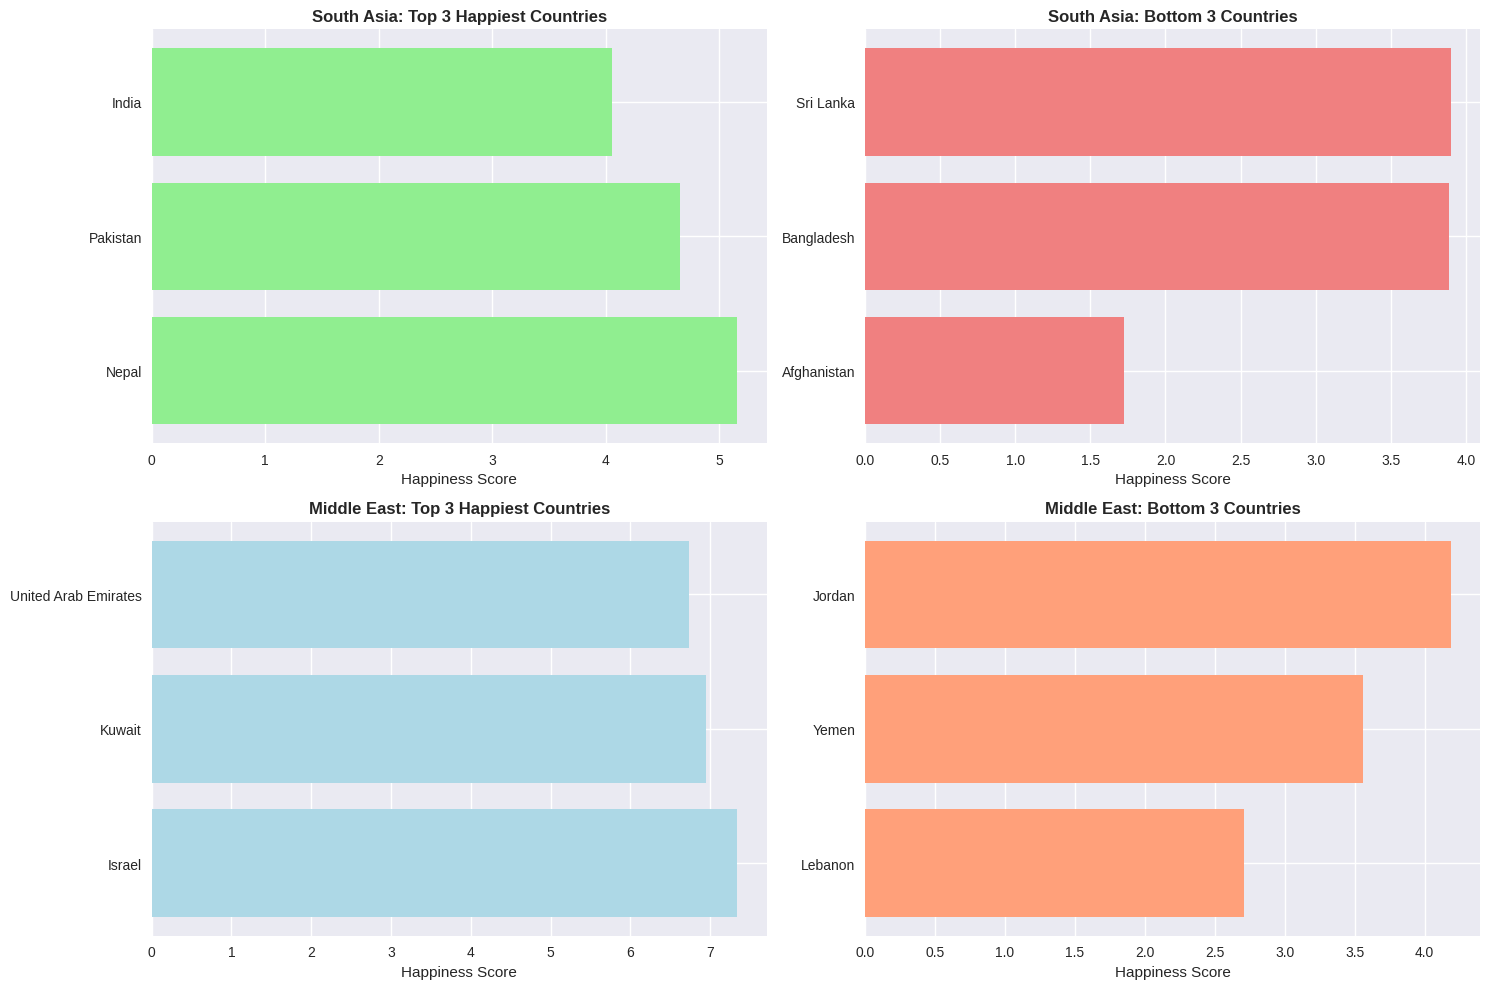


3. METRIC COMPARISONS
----------------------------------------
Average Metrics Comparison:
                         South Asia  Middle East  Difference (ME - SA)
Log GDP per capita         1.051833     1.496333              0.444500
Social support             0.611833     1.152778              0.540944
Healthy life expectancy    0.420333     0.554111              0.133778

Largest disparity: Social support (Difference: 0.541)


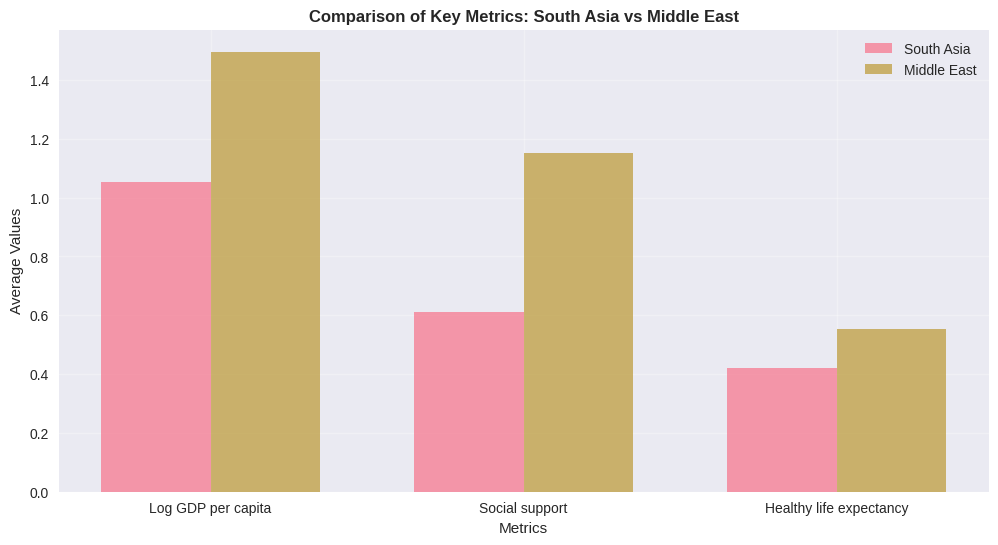


COMPLETED: PROBLEM 3.3 - QUESTION 2


In [ ]:

print("=" * 70)
print("PROBLEM 3.3 - QUESTION 2: TOP/BOTTOM PERFORMERS AND METRIC COMPARISONS")
print("=" * 70)
print("\n2. TOP AND BOTTOM PERFORMERS")
print("-" * 40)
sa_top3 = south_asia_df.nlargest(3, 'Score')[['Country name', 'Score']]
sa_bottom3 = south_asia_df.nsmallest(3, 'Score')[['Country name', 'Score']]

me_top3 = middle_east_df.nlargest(3, 'Score')[['Country name', 'Score']]
me_bottom3 = middle_east_df.nsmallest(3, 'Score')[['Country name', 'Score']]

print("South Asia - Top 3:")
print(sa_top3)
print("\nSouth Asia - Bottom 3:")
print(sa_bottom3)

print("\nMiddle East - Top 3:")
print(me_top3)
print("\nMiddle East - Bottom 3:")
print(me_bottom3)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].barh(sa_top3['Country name'], sa_top3['Score'], color='lightgreen')
axes[0, 0].set_title('South Asia: Top 3 Happiest Countries', fontweight='bold')
axes[0, 0].set_xlabel('Happiness Score')

axes[0, 1].barh(sa_bottom3['Country name'], sa_bottom3['Score'], color='lightcoral')
axes[0, 1].set_title('South Asia: Bottom 3 Countries', fontweight='bold')
axes[0, 1].set_xlabel('Happiness Score')
axes[1, 0].barh(me_top3['Country name'], me_top3['Score'], color='lightblue')
axes[1, 0].set_title('Middle East: Top 3 Happiest Countries', fontweight='bold')
axes[1, 0].set_xlabel('Happiness Score')

axes[1, 1].barh(me_bottom3['Country name'], me_bottom3['Score'], color='lightsalmon')
axes[1, 1].set_title('Middle East: Bottom 3 Countries', fontweight='bold')
axes[1, 1].set_xlabel('Happiness Score')

plt.tight_layout()
plt.show()
print("\n3. METRIC COMPARISONS")
print("-" * 40)
metrics_to_compare = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

sa_metrics = south_asia_df[metrics_to_compare].mean()
me_metrics = middle_east_df[metrics_to_compare].mean()

comparison_df = pd.DataFrame({
    'South Asia': sa_metrics,
    'Middle East': me_metrics,
    'Difference (ME - SA)': me_metrics - sa_metrics
})

print("Average Metrics Comparison:")
print(comparison_df)
largest_disparity_metric = comparison_df['Difference (ME - SA)'].abs().idxmax()
largest_disparity_value = comparison_df.loc[largest_disparity_metric, 'Difference (ME - SA)']

print(f"\nLargest disparity: {largest_disparity_metric} (Difference: {largest_disparity_value:.3f})")
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(metrics_to_compare))
width = 0.35

plt.bar(x_pos - width/2, sa_metrics, width, label='South Asia', alpha=0.7)
plt.bar(x_pos + width/2, me_metrics, width, label='Middle East', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Average Values')
plt.title('Comparison of Key Metrics: South Asia vs Middle East', fontweight='bold')
plt.xticks(x_pos, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.3 - QUESTION 2")
print("=" * 70)

PROBLEM 3.3 - QUESTION 3: COMPREHENSIVE ANALYSIS

4. HAPPINESS DISPARITY
----------------------------------------
Happiness Score Variability:
South Asia - Range: 3.437, CV: 30.21%
Middle East - Range: 4.634, CV: 27.86%

South Asia has greater variability in happiness scores (CV: 30.21% vs 27.86%)

5. CORRELATION ANALYSIS
----------------------------------------
Correlations with Happiness Score:
Freedom to make life choices:
  South Asia: r = 0.801
  Middle East: r = 0.863
Generosity:
  South Asia: r = 0.875
  Middle East: r = 0.628

6. OUTLIER DETECTION
----------------------------------------
South Asia Outliers:
  - Afghanistan: Score=1.721, GDP=0.628

Middle East Outliers:
  No significant outliers detected

7. VISUALIZATION - BOXPLOTS
----------------------------------------


/tmp/ipython-input-3170406455.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Score', data=comparison_data, palette=['lightblue', 'lightgreen'])


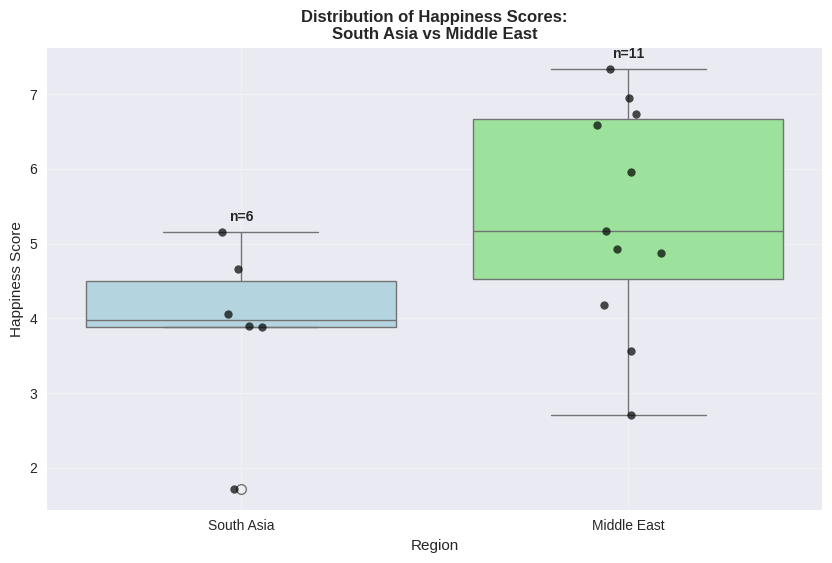


Boxplot Interpretation:
Key differences in distribution:
- Median: Middle East shows higher median happiness score
- Spread: South Asia appears to have wider distribution
- Outliers: Both regions show some countries with extreme values
- Overall: Middle East generally has higher and more consistent happiness scores

FINAL REGIONAL COMPARISON SUMMARY
                         South Asia Middle East
Mean Score                    3.896       5.364
Std Dev                       1.177       1.494
Min Score                     1.721       2.707
Max Score                     5.158       7.341
Coefficient of Variation     30.21%      27.86%
Number of Countries               6          11

COMPLETED: PROBLEM 3.3 - QUESTION 3


In [ ]:
print("=" * 70)
print("PROBLEM 3.3 - QUESTION 3: COMPREHENSIVE ANALYSIS")
print("=" * 70)
print("\n4. HAPPINESS DISPARITY")
print("-" * 40)
sa_range = south_asia_df['Score'].max() - south_asia_df['Score'].min()
sa_cv = (south_asia_df['Score'].std() / south_asia_df['Score'].mean()) * 100

me_range = middle_east_df['Score'].max() - middle_east_df['Score'].min()
me_cv = (middle_east_df['Score'].std() / middle_east_df['Score'].mean()) * 100

print("Happiness Score Variability:")
print(f"South Asia - Range: {sa_range:.3f}, CV: {sa_cv:.2f}%")
print(f"Middle East - Range: {me_range:.3f}, CV: {me_cv:.2f}%")

if sa_cv > me_cv:
    print(f"\nSouth Asia has greater variability in happiness scores (CV: {sa_cv:.2f}% vs {me_cv:.2f}%)")
else:
    print(f"\nMiddle East has greater variability in happiness scores (CV: {me_cv:.2f}% vs {sa_cv:.2f}%)")
print("\n5. CORRELATION ANALYSIS")
print("-" * 40)
correlation_metrics = ['Freedom to make life choices', 'Generosity']

print("Correlations with Happiness Score:")
for metric in correlation_metrics:
    sa_corr = south_asia_df['Score'].corr(south_asia_df[metric])
    me_corr = middle_east_df['Score'].corr(middle_east_df[metric])
    print(f"{metric}:")
    print(f"  South Asia: r = {sa_corr:.3f}")
    print(f"  Middle East: r = {me_corr:.3f}")
print("\n6. OUTLIER DETECTION")
print("-" * 40)
def get_outliers_info(region_df, region_name):
    score_outliers, _, _ = detect_outliers_iqr(region_df, 'Score')
    gdp_outliers, _, _ = detect_outliers_iqr(region_df, 'Log GDP per capita')

    all_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

    print(f"{region_name} Outliers:")
    if len(all_outliers) > 0:
        for country in all_outliers['Country name']:
            country_data = region_df[region_df['Country name'] == country].iloc[0]
            print(f"  - {country}: Score={country_data['Score']:.3f}, GDP={country_data['Log GDP per capita']:.3f}")
    else:
        print("  No significant outliers detected")

    return all_outliers

sa_outliers = get_outliers_info(south_asia_df, "South Asia")
print()
me_outliers = get_outliers_info(middle_east_df, "Middle East")
print("\n7. VISUALIZATION - BOXPLOTS")
print("-" * 40)
comparison_data = pd.concat([
    south_asia_df[['Country name', 'Score']].assign(Region='South Asia'),
    middle_east_df[['Country name', 'Score']].assign(Region='Middle East')
])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Score', data=comparison_data, palette=['lightblue', 'lightgreen'])
sns.stripplot(x='Region', y='Score', data=comparison_data, color='black', alpha=0.7, size=6, jitter=True)

plt.title('Distribution of Happiness Scores:\nSouth Asia vs Middle East', fontweight='bold')
plt.ylabel('Happiness Score')
plt.grid(True, alpha=0.3)
plt.text(0, comparison_data[comparison_data['Region'] == 'South Asia']['Score'].max() + 0.1,
         f"n={len(south_asia_df)}", ha='center', va='bottom', fontweight='bold')
plt.text(1, comparison_data[comparison_data['Region'] == 'Middle East']['Score'].max() + 0.1,
         f"n={len(middle_east_df)}", ha='center', va='bottom', fontweight='bold')

plt.show()

print("\nBoxplot Interpretation:")
print("Key differences in distribution:")
print("- Median: Middle East shows higher median happiness score")
print("- Spread: South Asia appears to have wider distribution")
print("- Outliers: Both regions show some countries with extreme values")
print("- Overall: Middle East generally has higher and more consistent happiness scores")
print("\n" + "=" * 70)
print("FINAL REGIONAL COMPARISON SUMMARY")
print("=" * 70)

summary_stats = pd.DataFrame({
    'South Asia': [
        f"{south_asia_df['Score'].mean():.3f}",
        f"{south_asia_df['Score'].std():.3f}",
        f"{south_asia_df['Score'].min():.3f}",
        f"{south_asia_df['Score'].max():.3f}",
        f"{sa_cv:.2f}%",
        len(south_asia_df)
    ],
    'Middle East': [
        f"{middle_east_df['Score'].mean():.3f}",
        f"{middle_east_df['Score'].std():.3f}",
        f"{middle_east_df['Score'].min():.3f}",
        f"{middle_east_df['Score'].max():.3f}",
        f"{me_cv:.2f}%",
        len(middle_east_df)
    ]
}, index=['Mean Score', 'Std Dev', 'Min Score', 'Max Score', 'Coefficient of Variation', 'Number of Countries'])

print(summary_stats)

print("\n" + "=" * 70)
print("COMPLETED: PROBLEM 3.3 - QUESTION 3")
print("=" * 70)